In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [141]:
root_path = '..'

# save_csv_path = f'/networks/dataset-network-out/NET_3/h_24/'
# file_1 = 'NET_3_bd_pattern_h_24_leak_area_0_nodes.csv' 
# 
save_csv_path = f'/networks/dataset-network-out/NET_3/h_720/'
file_1 = 'NET_3_bd_pattern_h_720_leak_area_0_nodes.csv' 

# save_csv_path = f'/networks/dataset-network-out/NET_3/h_720/'
# file_1 = 'NET_3_bd_0_05_h_720_leak_area_0_nodes.csv'

# save_csv_path = f'/networks/dataset-network-out/NET_3/h_720/'
# file_1 = 'NET_3_bd_0_0001_h_720_leak_area_0_nodes.csv'

wdn = pd.read_csv(root_path + save_csv_path + file_1, sep=';')

In [142]:
#inspect data structure
#head and columns
print(wdn.columns)
print(wdn.head())
print(len(wdn))

Index(['hour', 'nodeID', 'base_demand', 'demand_value', 'head_value',
       'pressure_value', 'x_pos', 'y_pos', 'node_type', 'has_leak',
       'leak_area_value', 'leak_discharge_value', 'leak_demand_value'],
      dtype='object')
      hour  nodeID  base_demand  demand_value  head_value  pressure_value  \
0  0:00:00    4922      0.00000       0.00000   55.947855       39.183855   
1  0:00:00    5656      0.00000       0.00000   55.947855       39.183855   
2  0:00:00    8596      0.00000       0.00000   55.947828       37.702500   
3  0:00:00    8598      0.00000       0.00000   55.947710       36.751406   
4  0:00:00    8600      0.00005       0.00005   55.947615       36.897616   

       x_pos       y_pos node_type  has_leak  leak_area_value  \
0  494117.01  1376679.17  Junction     False              0.0   
1  494110.13  1376302.88  Junction     False              0.0   
2  494155.35  1379384.78  Junction     False              0.0   
3  494320.25  1379386.96  Junction     False 

In [143]:
nodeListValue = wdn['nodeID'].unique()
print(nodeListValue)
print(len(nodeListValue))
NodeNumber = len(nodeListValue)

[  4922   5656   8596   8598   8600   8602   8604   8606   8608   8610
   8612   8614   8616   8618   8620   8622   8624   8626   8628   8630
   8632   8634   8636   8638   8640   8642   8644   8646   8648   8650
   8652   8654   8656   8658   8660   8662   8664   8666   8668   8670
   8672   8674   8676   8678   8680   8682   8684   8686   8688   8690
   8692   8694   8696   8698   8700   8702   8704   8706   8708   8710
   8712   8714   8716   8718   8720   8722   8724   8726   8728   8730
   8732   8734   8736   8738   8740   8742   8744   8746   8792   9402
   9410 880081   7384]
83


In [144]:
#group by node
meanDemandValue = wdn.groupby(['nodeID'])['demand_value'].mean()
print(meanDemandValue)
wdn.groupby('nodeID').demand_value.agg(['min', 'max', 'mean'])

nodeID
4922      0.000000
5656      0.000000
7384      0.001542
8596      0.000000
8598      0.000000
            ...   
8746      0.000000
8792      0.000000
9402      0.000000
9410      0.000000
880081    0.000000
Name: demand_value, Length: 83, dtype: float64


,min,max,mean
nodeID,,,
4922,0.000000,0.000000,0.000000
5656,0.000000,0.000000,0.000000
7384,0.000715,0.002327,0.001542
8596,0.000000,0.000000,0.000000
8598,0.000000,0.000000,0.000000
...,...,...,...
8746,0.000000,0.000000,0.000000
8792,0.000000,0.000000,0.000000
9402,0.000000,0.000000,0.000000


In [145]:
unique_node_type = wdn['node_type'].unique()
print(unique_node_type)

['Junction' 'Reservoir']


In [146]:
nodes_reservoir = wdn.loc[wdn['node_type']=='Reservoir'].groupby('nodeID')[['x_pos', 'y_pos']].min()
# print(nodes_reservoir)

nodes_junction = wdn.loc[wdn['node_type']=='Junction'].groupby('nodeID')[['x_pos', 'y_pos']].min()
#print(nodes_junction)

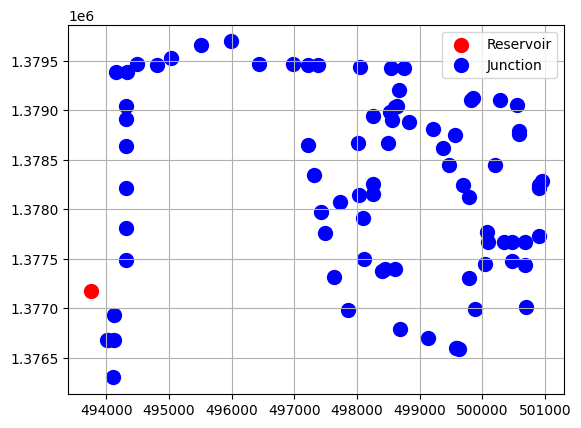

In [147]:

# 
cdict = {1: 'red', 2: 'blue', 3: 'green'}

nodes_pos_x = np.array(nodes_reservoir['x_pos'])
nodes_pos_y = np.array(nodes_reservoir['y_pos'])

plt.scatter(nodes_pos_x, nodes_pos_y, c = cdict[1], label = "Reservoir", s = 100)

nodes_pos_x = np.array(nodes_junction['x_pos'])
nodes_pos_y = np.array(nodes_junction['y_pos'])
plt.scatter(nodes_pos_x, nodes_pos_y, c = cdict[2], label = "Junction", s = 100)

plt.grid()
plt.legend()

# 
# for index, row in nodes_junction.iterrows():
#   # print(row)
#   plt.text(row['x_pos'], row['y_pos'], index, horizontalalignment='left', size='small', color='black')

# group = np.array([1,2,3])
# cdict = {1: 'red', 2: 'blue', 3: 'green'}
# plt.scatter(nodes_pos_x[0:10], nodes_pos_y[0:10], c = cdict[1], label = group[0], s = 100)
# plt.scatter(nodes_pos_x.iloc[10:20], nodes_pos_y.iloc[10:20], c = cdict[2], label = group[1], s = 100)
# plt.scatter(nodes_pos_x.iloc[20:30], nodes_pos_y.iloc[20:30], c = cdict[3], label = group[2], s = 100)

0 : 83
166 : 249
332 : 415
498 : 581
664 : 747
830 : 913
996 : 1079
1162 : 1245
1328 : 1411
1494 : 1577
1660 : 1743
1826 : 1909


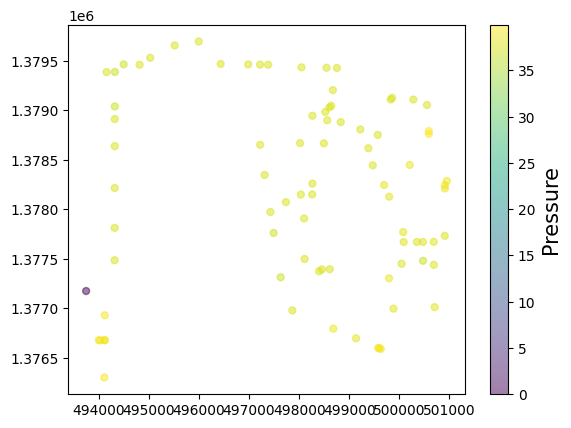

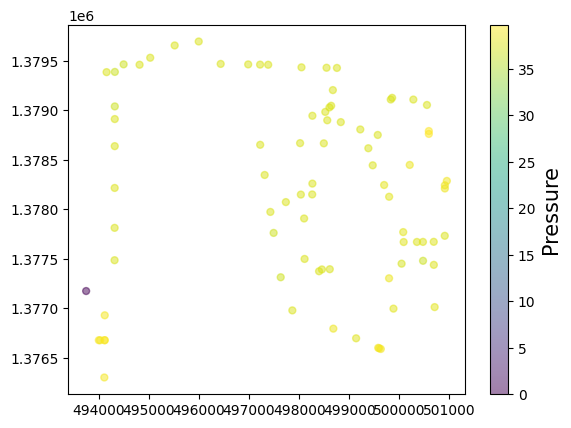

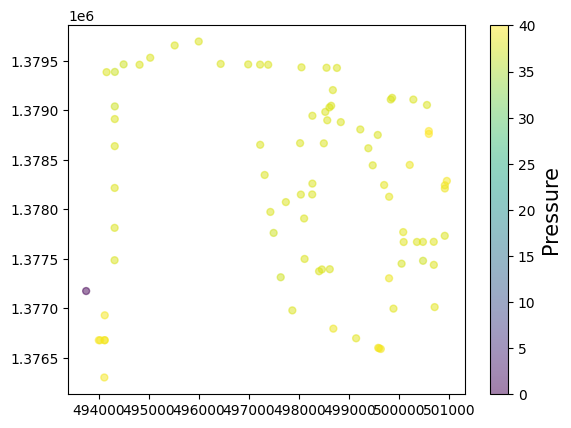

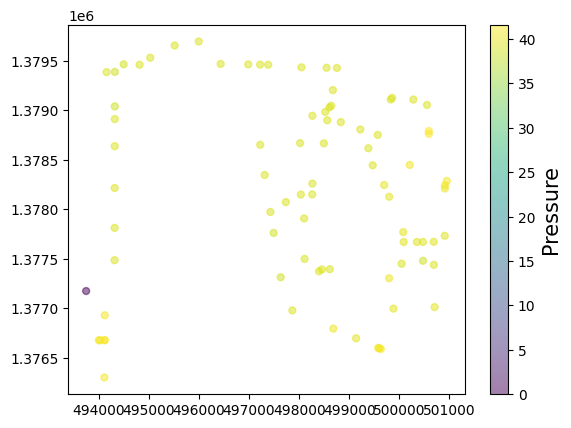

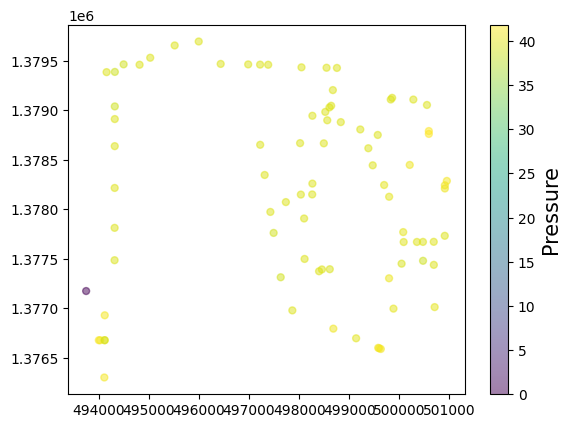

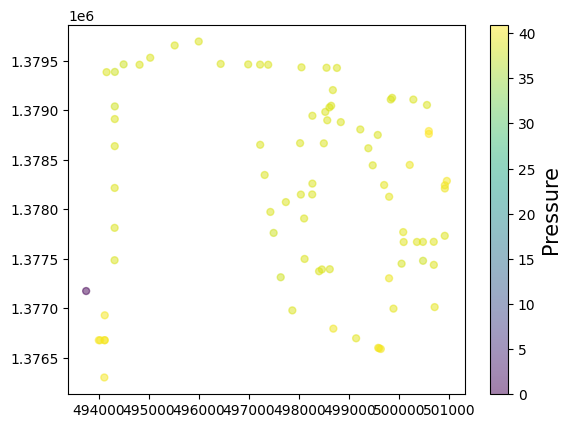

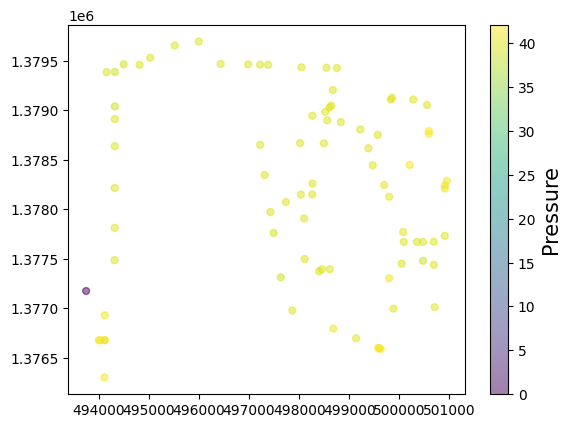

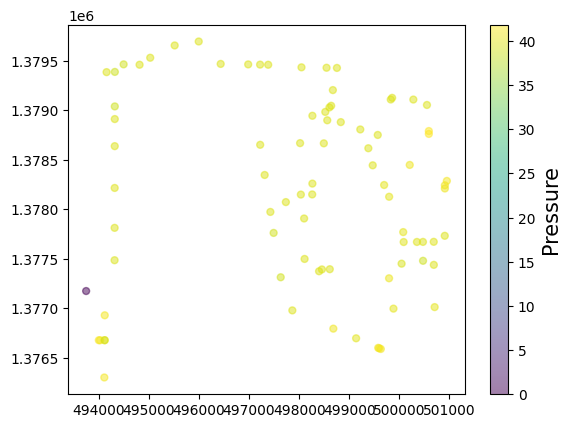

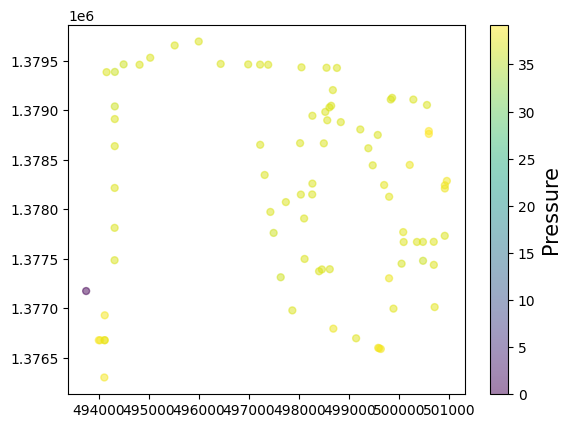

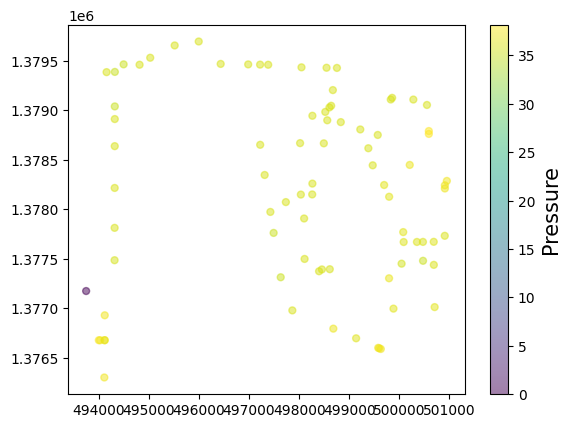

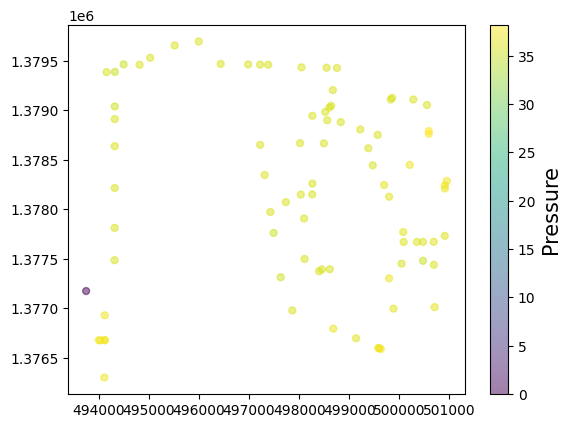

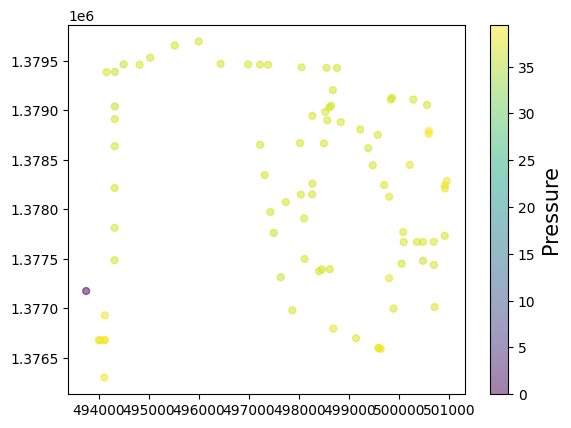

In [148]:
N = wdn.shape[0] #50
x = wdn.loc[:NodeNumber, 'x_pos'] #np.random.rand(N)
y = wdn.loc[:NodeNumber, 'y_pos'] #np.random.rand(N)



area = 25 # (30 * np.random.rand(N))**2  # 0 to 15 point radii
figureIndex = 0
for index in range(24):

    if index%2==0:
      print(index*NodeNumber, ":", (index+1)*NodeNumber)
      colors_pressure = wdn.loc[index*NodeNumber:(index+1)*NodeNumber, 'pressure_value'] 
      colors_demand = wdn.loc[index*NodeNumber:(index+1)*NodeNumber, 'demand_value']

      fig = plt.figure(index)
        
      plt.scatter(x, y, s=area, c=colors_pressure, alpha=0.5)
      cbar = plt.colorbar()
      cbar.ax.set_ylabel('Pressure', rotation=90, size=15)
      #         
      # plt.scatter(x, y, s=area, c=colors_demand, alpha=0.5)
      # cbar = plt.colorbar()
      # cbar.ax.set_ylabel('Demand_value', rotation=90, size=15)
     

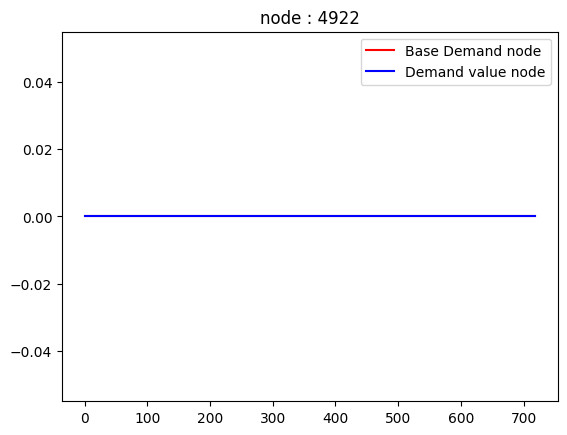

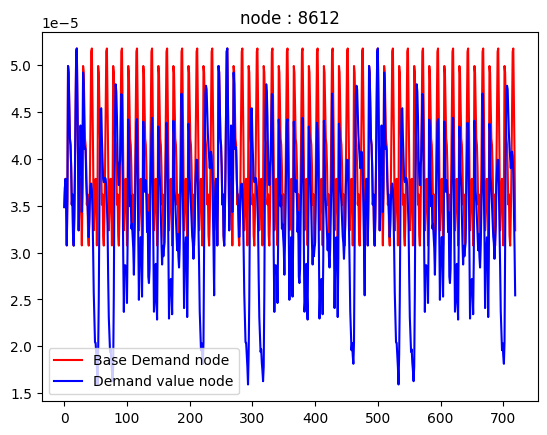

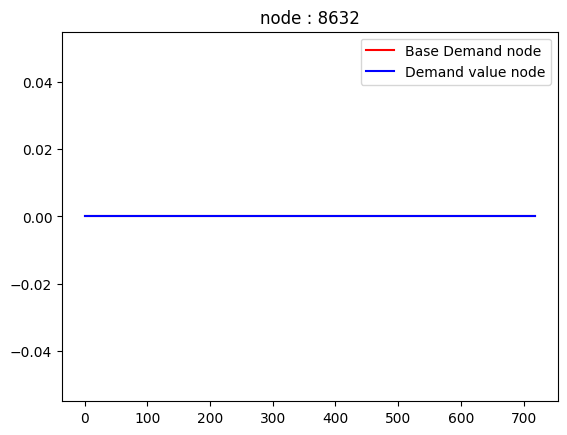

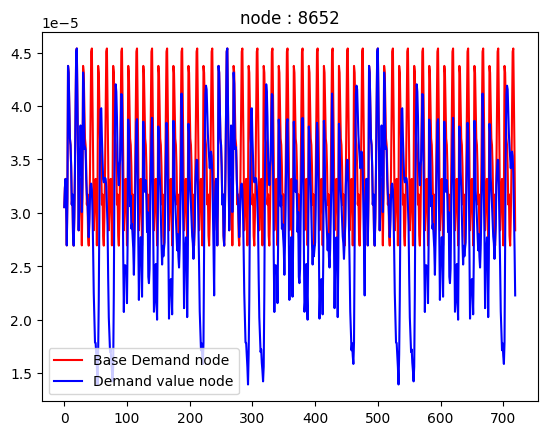

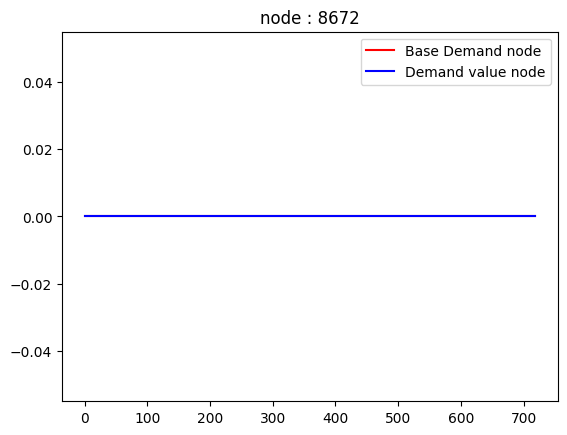

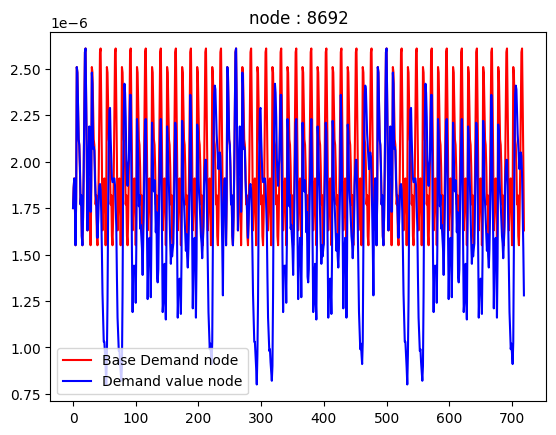

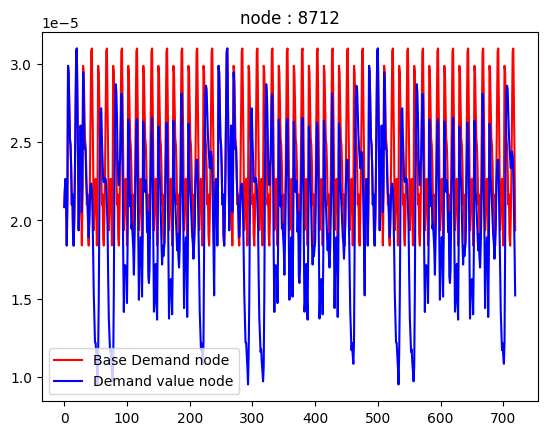

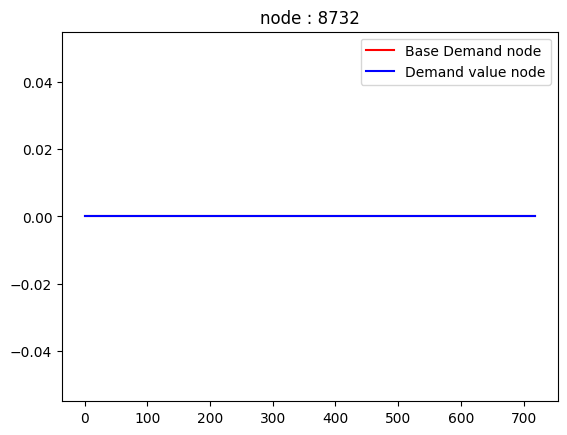

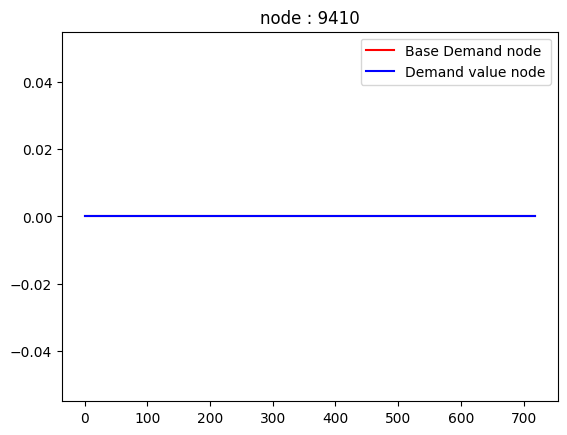

In [149]:
#select node and plot demand (base and value) 

figureIndex = 0


for node in nodeListValue:

    if figureIndex%10==0:

      fig = plt.figure(figureIndex)
      # print("node : ", node)
      dataToPlot = wdn.loc[(wdn['nodeID'] == node)]
      
      baseDemandToPlot = dataToPlot['base_demand'].values #*  3.785412 * 60
      # leakDemandToPlot = dataToPlot['leak_demand_value'].values #*  3.785412 * 60
      demandToPlot = dataToPlot['demand_value'].values #*  3.785412 * 60

      xs = np.arange(len(demandToPlot))

      plt.plot(xs, baseDemandToPlot,  'r', label='Base Demand node')
      plt.plot(xs, demandToPlot,  'b', label='Demand value node')
      # plt.plot(xs, leakDemandToPlot, label='Leak Demand value node')
      plt.title("node : "+ str(node))
      plt.legend()
        
    figureIndex += 1
    if figureIndex>100:
      break

plt.show()


In [150]:
nodes_reservoir = wdn.loc[wdn['node_type']=='Reservoir'].groupby('nodeID')[['x_pos', 'y_pos']].min()
# print(nodes_reservoir)

nodes_junction = wdn.loc[wdn['node_type']=='Junction'].groupby('nodeID')[['x_pos', 'y_pos']].min()
print(nodes_junction)

            x_pos       y_pos
nodeID                       
4922    494117.01  1376679.17
5656    494110.13  1376302.88
8596    494155.35  1379384.78
8598    494320.25  1379386.96
8600    494495.39  1379463.39
...           ...         ...
8746    500947.50  1378286.76
8792    500703.60  1377013.26
9402    494025.60  1376678.69
9410    494118.61  1376930.61
880081  494000.44  1376678.87

[82 rows x 2 columns]


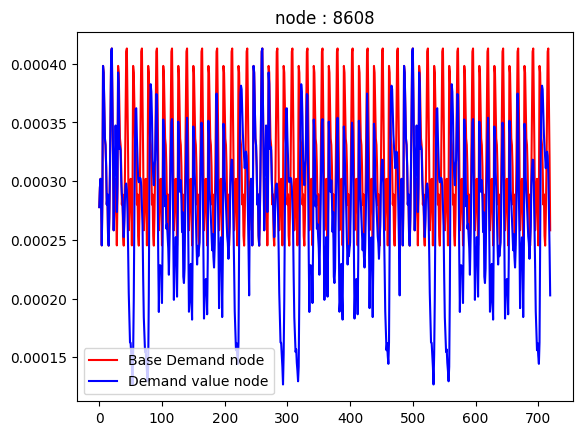

In [151]:
figureIndex = 0
nodeListValue=[8608]
# nodeListValue = wdn['nodeID'].unique()

for node in nodeListValue:

    if figureIndex%10==0:

      fig = plt.figure(figureIndex)
      # print("node : ", node)
      dataToPlot = wdn.loc[(wdn['nodeID'] == node)]
      # print(dataToPlot)
      baseDemandToPlot = dataToPlot['base_demand'].values #*  3.785412 * 60
      # leakDemandToPlot = dataToPlot['leak_demand_value'].values #*  3.785412 * 60
      demandToPlot = dataToPlot['demand_value'].values #*  3.785412 * 60

      xs = np.arange(len(demandToPlot))

      plt.plot(xs, baseDemandToPlot,  'r', label='Base Demand node')
      plt.plot(xs, demandToPlot,  'b', label='Demand value node')
      # plt.plot(xs, leakDemandToPlot, label='Leak Demand value node')
      plt.title("node : "+ str(node))
      plt.legend()

    figureIndex += 1

plt.show()

In [152]:


nodes_agg = wdn.loc[wdn['node_type']=='Junction'].groupby('nodeID')[['base_demand','demand_value']].agg(['mean'])



print(nodes_agg['base_demand']['mean'])
nodes_bd_mean = np.array(nodes_agg['base_demand']['mean'])
nodes_dv_mean = np.array(nodes_agg['demand_value']['mean'])
nodes_dd = nodes_bd_mean - nodes_dv_mean
print(nodes_dd)


nodeID
4922      0.000000
5656      0.000000
8596      0.000000
8598      0.000000
8600      0.000057
            ...   
8746      0.000000
8792      0.000000
9402      0.000000
9410      0.000000
880081    0.000000
Name: mean, Length: 82, dtype: float64
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 7.63966667e-06 2.05458333e-07 1.32608333e-06 3.32200000e-06
 4.24447917e-05 1.31475000e-05 5.32320833e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.99250000e-07 4.32645833e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.24692917e-05 4.66587500e-06 1.55866667e-06
 0.00000000e+00 0.00000000e+00 3.66708333e-07 0.00000000e+00
 1.55941667e-06 8.49916667e-07 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.09615000e-05
 6.28683333e-06 5.97383333e-06 2.85108333e-06 2.87500000e-09
 9.00166667e-

[64 10  3  2  0  1  0  0  1  1]
[0.00000000e+00 4.24447917e-06 8.48895833e-06 1.27334375e-05
 1.69779167e-05 2.12223958e-05 2.54668750e-05 2.97113542e-05
 3.39558333e-05 3.82003125e-05 4.24447917e-05]


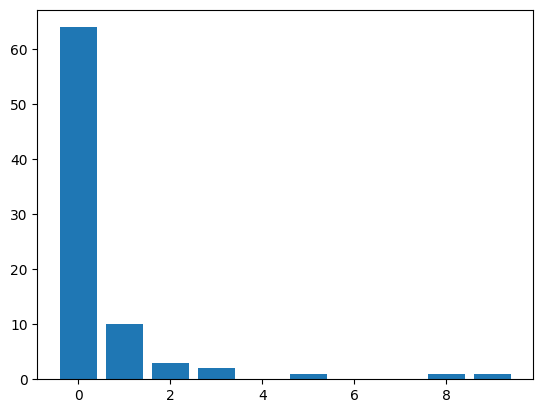

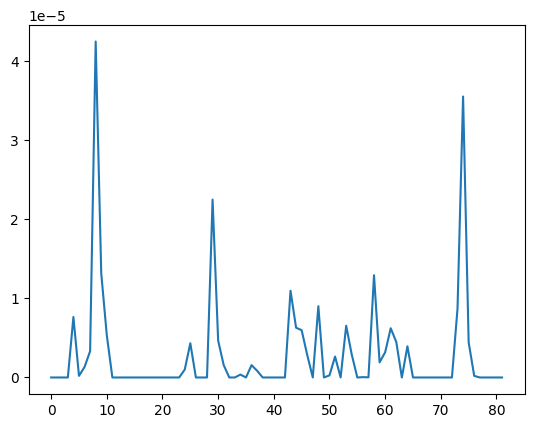

In [153]:
num_bins = 10
count, division = np.histogram(nodes_dd, bins=num_bins)
print(count)
print(division)
plt.figure(1)
plt.bar(range(num_bins), count)

plt.figure(2)
plt.plot(nodes_dd)



[76  3  1  2]
[0.00000000e+00 1.06111979e-05 2.12223958e-05 3.18335938e-05
 4.24447917e-05]


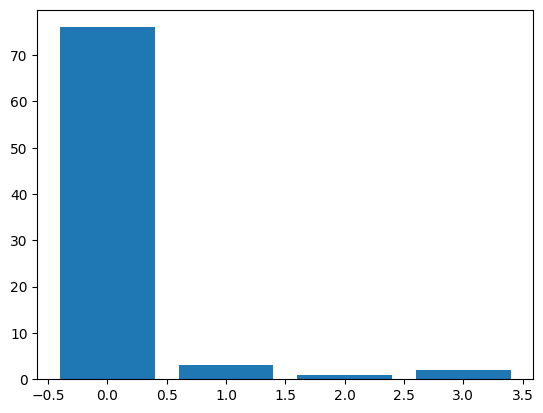

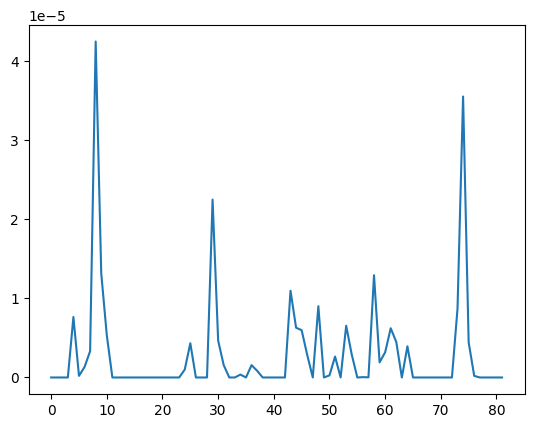

In [154]:
nodes_dd_cleaned_index = np.where(nodes_dd < 0.05)
nodes_dd_cleaned = nodes_dd[nodes_dd_cleaned_index]
nodes_pos_x_cleaned = nodes_pos_x[nodes_dd_cleaned_index]
nodes_pos_y_cleaned = nodes_pos_y[nodes_dd_cleaned_index]

num_bins = 4
count, division = np.histogram(nodes_dd_cleaned, bins=num_bins)
print(count)
print(division)
plt.figure(1)
plt.bar(range(num_bins), count)

plt.figure(2)
plt.plot(nodes_dd_cleaned)


In [155]:
print(division)

[0.00000000e+00 1.06111979e-05 2.12223958e-05 3.18335938e-05
 4.24447917e-05]


(array([ 4,  5,  6,  7, 10, 24, 25, 30, 31, 34, 36, 37, 44, 45, 46, 47, 48,
       50, 51, 53, 54, 56, 57, 59, 60, 61, 62, 64, 73, 75, 76]),)
(array([ 9, 43, 58]),)
(array([29]),)
(array([74]),)
[(array([ 4,  5,  6,  7, 10, 24, 25, 30, 31, 34, 36, 37, 44, 45, 46, 47, 48,
       50, 51, 53, 54, 56, 57, 59, 60, 61, 62, 64, 73, 75, 76]),), (array([ 9, 43, 58]),), (array([29]),), (array([74]),)]


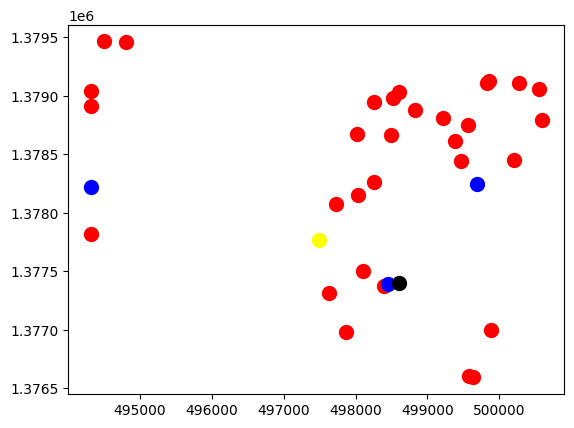

In [156]:
nodes_group_index = []

group = np.array([1,2,3,4])
cdict = {0: 'red', 1: 'blue', 2: 'yellow', 3: 'black'}

for index in range(len(division)):
  if index > 0:
    nodes_group_index.append(np.where( (nodes_dd_cleaned > division[index-1]) & (nodes_dd_cleaned < division[index]) ))
    # nodes_group_index.append(np.where(nodes_dd_cleaned > division[index-1]))
    print(nodes_group_index[-1])
    plt.scatter(nodes_pos_x_cleaned[nodes_group_index[-1]], nodes_pos_y_cleaned[nodes_group_index[-1]], c = cdict[index-1], label = group[index-1], s = 100)
    # plt.scatter(nodes_pos_x_cleaned[nodes_group_index[-1]], nodes_pos_y_cleaned[nodes_group_index[-1]])


print(nodes_group_index)

[3 3 6 ... 0 0 1]
0
1
2
3
4
5
6


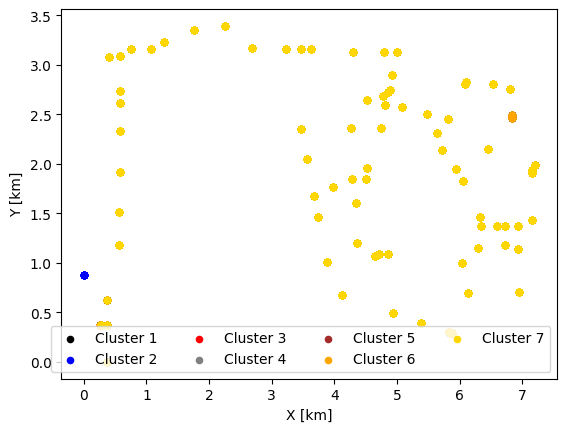

In [157]:
colors = ['black',  'blue', 'red', 'grey', 'brown',  'orange', 'gold', 'yellow', 'cyan', 'pink']
nodeList = wdn.nodeID.unique()

# nodeGroup = wdn.groupby('nodeID').mean()
# nodeLeakageGroup = wdn.groupby('nodeID').mean()
# nodeLeakageGroup2 = wdn.groupby('nodeID').mean()

#print network topology
min_x_pos = wdn["x_pos"].min()
min_y_pos = wdn["y_pos"].min()

numberOutputCluster = 7 # 9 #12
cluster_map = pd.DataFrame()
kmeans_matrix = wdn.drop (columns=[
'hour', 'nodeID', 'node_type', 'has_leak', 'leak_area_value', 'leak_discharge_value', 'leak_demand_value', 'x_pos', 'y_pos'
]).values

if len(kmeans_matrix)>numberOutputCluster:
    kmeans = KMeans(n_clusters=numberOutputCluster)
    kmeans.fit(kmeans_matrix)
    # cluster_map['dev_eui'] = diff_df.index.values
    # kmeans_matrix['cluster'] = kmeans.labels_
    clusterLabel = kmeans.labels_ # kmeans label
    wdn['cluster'] = kmeans.labels_
    print(clusterLabel)

    colsCoordinates = ["x_pos", "y_pos", "has_leak"]
    
    fig2, axs2 = plt.subplots(1, 1, sharex=True, sharey=True, gridspec_kw={'hspace': 0})
    colorIndex = 0
    
    for label in np.unique(clusterLabel):
        print(label)
        # node = nodeList[jj-1]
        # nodeGroupListRow.append(node)
        # lostDemandToPlot = nodeGroup.loc[node, colsCoordinates]
    
        cs = colors[colorIndex]
        nodeGroup = wdn.loc[ wdn['cluster'] == label]
    
        # if jj % 10 == 0:
        # 	axs2.scatter((lostDemandToPlot['x_pos']-min_x_pos)/1000, (lostDemandToPlot['y_pos']-min_y_pos)/1000, marker='o', c=cs, s=30, label = 'Group '+str(colorIndex+1))
        # 	# axs2.annotate(str(nodeGroup.index[jj-1]), xy=(lostDemandToPlot['x_pos'], lostDemandToPlot['y_pos']), xytext=(10,20), textcoords='offset points', fontsize=6)
        # else:
        # 	axs2.scatter((lostDemandToPlot['x_pos']-min_x_pos)/1000, (lostDemandToPlot['y_pos']-min_y_pos)/1000, marker='o', c=cs, s=30)
        # 	# axs2.annotate(str(nodeGroup.index[jj-1]), xy=(lostDemandToPlot['x_pos'], lostDemandToPlot['y_pos']), xytext=(10,20), textcoords='offset points', fontsize=6)
    
        axs2.scatter((nodeGroup['x_pos']-min_x_pos)/1000, (nodeGroup['y_pos']-min_y_pos)/1000, marker='o', c=cs, s=20, label = 'Cluster '+str(label+1))
    
        if True:
            colorIndex += 1
            # nodeGroupList.append(nodeGroupListRow)
            # nodeGroupListRow = []
    
    # nodeGroupList.append(nodeGroupListRow)
    # print(nodeGroupList)
    # sys.exit(1)
    
   
    
    
    axs2.legend(ncol=4, loc='lower right')
    axs2.set_ylabel('Y [km]')
    axs2.set_xlabel('X [km]')
    # axs2.set_ylim([-0.8, 4.2])
    
    # output_filename = "tensorflow_group_datasets/fig/node_network_group_position.pdf"
    # plt.savefig(output_filename, dpi=300, bbox_inches="tight")
    plt.show()
